# **Data Preprocessing**

## Objectives

* Import Libraries: Loaded necessary libraries for data manipulation and visualization.
* Load Data: Loaded the dataset and displayed the initial records.
* Data Exploration: Explored the data by checking for missing values and visualizing them.
* Handle Missing Values: Dropped or filled missing values.
* Data Transformation: Converted categorical variables to numeric format.
* Feature Selection: Selected features based on their correlation with the target variable.
* Split Data: Split the data into training and testing sets and saved the processed data.

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/PP5-Predictive-Analytics/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/PP5-Predictive-Analytics'

# Import Libraries and Load Data:

1. Import required Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the Dataset

In [5]:
# Load the dataset
df = pd.read_csv('data/dataset.csv')

# Display the first few rows of the dataset
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


---

# Data Exploration:

Basic Statistics

In [6]:
df.describe()

,Age
count,349.000000
mean,46.323782
std,13.085090
min,19.000000
25%,35.000000
50%,45.000000
75%,55.000000
max,90.000000


Check for Missing Values

In [7]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

Visualization missing Data

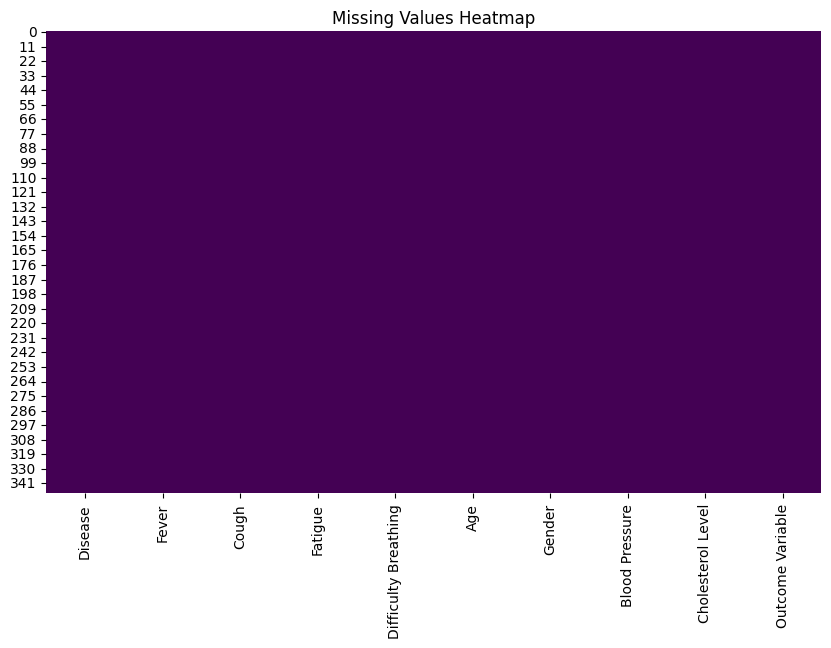

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

---

# Handle missing values:

Drop missing Values

In [42]:
df_cleaned = df.dropna()

Fill missing Values

In [43]:
# Fill missing values with mean value
# Create a copy of the original DataFrame
df_filled = df.copy()

# Iterate through each column in the DataFrame
for col in df_filled.columns:
    if pd.api.types.is_numeric_dtype(df_filled[col]):  # Check if column is numeric
        df_filled[col] = df_filled[col].fillna(df_filled[col].mean())  # Fill NaN with mean
    else:
        df_filled[col] = df_filled[col].fillna('')  # Fill NaN with empty string for non-numeric columns

# Display the first few rows of the filled dataset
print(df_filled.head())

       Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0    Influenza   Yes    No     Yes                  Yes   19  Female   
1  Common Cold    No   Yes     Yes                   No   25  Female   
2       Eczema    No   Yes     Yes                   No   25  Female   
3       Asthma   Yes   Yes      No                  Yes   25    Male   
4       Asthma   Yes   Yes      No                  Yes   25    Male   

  Blood Pressure Cholesterol Level Outcome Variable  
0            Low            Normal         Positive  
1         Normal            Normal         Negative  
2         Normal            Normal         Negative  
3         Normal            Normal         Positive  
4         Normal            Normal         Positive  


---

# Data Transformation:

Convert categorical variables to Numeric

In [44]:
# Convert categorical variables to numeric using one-hot encoding
df_transformed = pd.get_dummies(df_cleaned, drop_first=True)

---

# Feature selection:

Correlation matrix

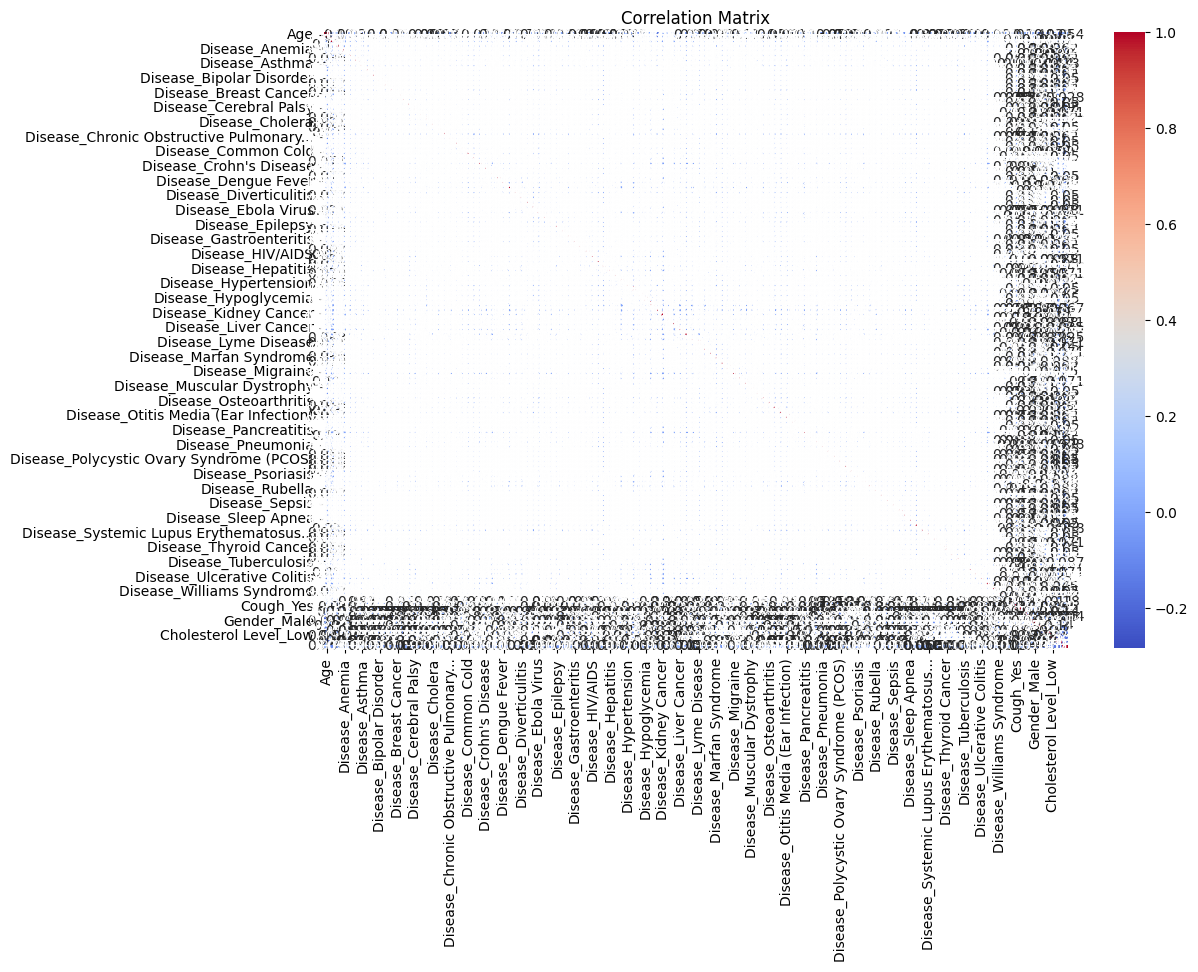

In [45]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_transformed.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Select features based on correlation

In [46]:
# Calculate correlation matrix
corr_matrix = df_transformed.corr()

# Define the target variable column name
target_column = 'Outcome Variable_Positive'  # Replace with your actual target column name

# Select features with high correlation to the target variable
target_corr = corr_matrix[target_column].sort_values(ascending=False)
selected_features = target_corr[target_corr > 0.1].index.tolist()

# Print selected features
print("Selected Features:", selected_features)

Selected Features: ['Outcome Variable_Positive', 'Fever_Yes', 'Fatigue_Yes', 'Disease_Asthma']


---

# Split the data into training and testing sets:

Split Data

In [47]:
# Example assuming 'Outcome Variable_Positive' is the target column based on previous diagnostics
target_column = 'Outcome Variable_Positive'

# Check if target_column exists in df_transformed columns
if target_column in df_transformed.columns:
    # Define features (X) and target (y)
    X = df_transformed[selected_features].drop(target_column, axis=1)
    y = df_transformed[target_column]
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Save the preprocessed data
    X_train.to_csv('data/X_train.csv', index=False)
    X_test.to_csv('data/X_test.csv', index=False)
    pd.DataFrame(y_train).to_csv('data/y_train.csv', index=False, header=[target_column])
    pd.DataFrame(y_test).to_csv('data/y_test.csv', index=False, header=[target_column])
else:
    print(f"Error: '{target_column}' not found in df_transformed. Check your preprocessing steps.")

---

# Summary and save the notebook:

## Data Preprocessing Summary

- Loaded dataset from `data/dataset.csv`.
- Explored the dataset and visualized missing values.
- Handled missing values by dropping rows with missing data.
- Converted categorical variables to numeric using one-hot encoding.
- Selected features based on correlation with the target variable.
- Split the data into training and test sets.
- Saved the preprocessed data for model training.

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [35]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (2852421808.py, line 5)